# Perceptron Lab

This is the scaffold notebook for the perceptron lab and each lab will have a similar scaffold.  Make your own copy of this notebook and then you can fill in the tasks.  **You will fill in code boxes and test boxes with discussion for most tasks** and particularly discussion of results, graphs, etc. Good writing, grammar, punctuation, etc. are important and points will be taken off if these things are lacking. 

In most cases just reporting results without discussion will not receive full credit. Thus, your discussion should also include sentences like the following: This is because…  Note that the …  I was surprised to observe… I am not sure why …, but my hypothesis is that …

Start by looking over the scikit-learn [user guide](https://scikit-learn.org/stable/user_guide.html) and carefully reading over the [perceptron documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html).

In [45]:
# imports
import numpy as np
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt

def load_data(filename: str, max_itr: int, plot: bool = False) -> None:
    clf = Perceptron(shuffle=False, verbose=1, eta0=.1, max_iter=max_itr)
    Data_Set = arff.loadarff(filename)
    Data_Set_df = pd.DataFrame(Data_Set[0])
    Data_Set_np = Data_Set_df.to_numpy()
    Data_Set_np = Data_Set_np.astype(float)
    X = Data_Set_np[:, :-1]
    y = Data_Set_np[:, -1]
    clf.fit(X, y)
    # Print weights, intercept, and accuracy
    print("Weights:", clf.coef_)
    print("Intercept:", clf.intercept_)
    print("Accuracy:", clf.score(X, y))

    # Plotting if plot is True
    if plot:
        x1_values = X[:, 0]
        x2_values = X[:, 1]

        # Create a new figure for each plot
        plt.figure()

        # Plotting the data points
        plt.scatter(x1_values, x2_values, c=y, cmap=plt.cm.Paired, marker='o')

        # Plotting the decision boundary line
        if len(clf.coef_[0]) == 2:  # Check if there are two features
            x_line = np.linspace(np.min(x1_values), np.max(x1_values), 100)
            y_line = (-clf.coef_[0, 0] / clf.coef_[0, 1]) * x_line - clf.intercept_[0] / clf.coef_[0, 1]

            plt.plot(x_line, y_line, 'k-', label='Decision Boundary')

        # Adding labels and legend
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.title('Perceptron Decision Boundary')
        plt.legend()

        # Show the plot
        plt.show()

## 1. Debug and Evaluation

For most labs we will give you some data and expected results so that you can verify that you are doing things right and getting appropriate results.  We will then have you run on some other data with the exact same hyperparameters so we can see if your results are correct. 

### 1.1 Debug (5%)
Download this [data set](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/linsep2nonorigin.arff) into your local directory and name it debug.arff.  To download rather than view, right-click the link and save as.  To allow consistent results run the Perceptron using the following hyperparameters:
- Learning rate = .1
- Do NOT shuffle the data after every epoch like you would normally do
- Learn for a maximum of 10 epochs
- Start all weights at 0 (which is the default for this scikit-learn implementation)  

Your results should be:
Accuracy = [.875]\
Final Weights = [[-0.23  0.18]]\
[-0.1] - This last weight is the bias weight, which they call the intercept.

To help you with this first task, following is one detailed variation that would do this for you. You may use your own variation.  Note that commonly used variable names in the community are clf (classifier), X (array of input features), y (vector of output labels).

In [21]:
from sklearn.linear_model import Perceptron

load_data('debug.arff', 10)

-- Epoch 1
Norm: 0.04, NNZs: 2, Bias: -0.100000, T: 8, Avg. loss: 0.013500
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.07, NNZs: 2, Bias: -0.100000, T: 16, Avg. loss: 0.011875
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.11, NNZs: 2, Bias: -0.100000, T: 24, Avg. loss: 0.010250
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.14, NNZs: 2, Bias: -0.100000, T: 32, Avg. loss: 0.008625
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.18, NNZs: 2, Bias: -0.100000, T: 40, Avg. loss: 0.007000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.21, NNZs: 2, Bias: -0.100000, T: 48, Avg. loss: 0.005375
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.23, NNZs: 2, Bias: -0.100000, T: 56, Avg. loss: 0.008250
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.25, NNZs: 2, Bias: -0.100000, T: 64, Avg. loss: 0.007625
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.27, NNZs: 2, Bias: -0.100000, T: 72, Avg. loss: 0.007000
Total training time: 0.00 seconds.
--

/Users/zacharyburns/Documents/repos/python/201R/venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Notes:
* If you increase (or just remove) max_iter your perceptron will converge to 100% in one more epoch.  Try it!
* verbose (integer) specifies how much info you get after each epoch.  It does not change results.  Try it with 0.
    * Norm is a measure of the total weight magnitudes in the current model.
    * NNZs is the number of non-zero weights there currently are (not including the bias).
    * clf.intercept_ is the value of the bias weight, NOT the actual y-intercept of the decision surface, though it will affect that.
    * T is the total number of weight updates so far.  In this case all the weights were updated each epoch.
    * Avg. loss is another measure of error.  More on that later.
    * The activation function outputs 1 if net > 0, else 0.

### 1.2 (5%) Evaluation

Now run your model  on the [evaluation dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/data_banknote_authentication.arff) and report the final accuracy, weights, and bias. Use the exact same hyperparameters as the debug dataset. The most common reason for results not matching ours is not exactly using the same hyperparameters (e.g. initial weights, training exactly 10 epochs, no shuffling, etc.) Hint: Throughout these labs for the numerous cases where you are doing the same task, but with different data (e.g. debug, eval), you could create a function where you just pass the data set name, so as not to recreate the code multiple times.

In [22]:
# Load evaluation data
# Train on the evaluation data
# print your accuracy and weights. Do not enter these values by hand.

load_data('data_banknote_authentication.arff', 10)


-- Epoch 1
Norm: 1.42, NNZs: 4, Bias: 2.100000, T: 1372, Avg. loss: 0.023615
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.90, NNZs: 4, Bias: 2.600000, T: 2744, Avg. loss: 0.022359
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 3.62, NNZs: 4, Bias: 3.500000, T: 4116, Avg. loss: 0.028435
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 4.36, NNZs: 4, Bias: 3.700000, T: 5488, Avg. loss: 0.013195
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 4.51, NNZs: 4, Bias: 4.300000, T: 6860, Avg. loss: 0.015216
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 4.70, NNZs: 4, Bias: 4.700000, T: 8232, Avg. loss: 0.026061
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 5.40, NNZs: 4, Bias: 4.600000, T: 9604, Avg. loss: 0.018060
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 5.83, NNZs: 4, Bias: 4.800000, T: 10976, Avg. loss: 0.018378
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 5.88, NNZs: 4, Bias: 5.200000, T: 12348, Avg. loss: 0.015085
Total training time: 0.00

*Discussion - Open this box and type in your discussion.*  Note that after each exercise you will have a chance to discuss your effort and results.

Final Accuracy = 0.9766763848396501
Final Weights = [-4.28857497 -2.390381   -3.0160324  -1.1686672 ]
Final Bias Weight = [5.2]

I noticed while looking at the training data that the target switches from being 0 to 1 at a certain point. There must be something different about the data to make it so that a change in target is necessary. A quick glance at the data showed that for inputs where the target was 0, the first input was more likely to be positive. On the other hand, inputs where the target was 1, the first input was more likely to be negative. My theory is that the first input of each vector carries the most weight in the decision. That could be why in the final weights, the first weight as the greatest absolute value.

## 2. Classifying on linearly separable and non-linearly separable data

### 2.1 (5%) Create 2 datasets

- Both with 8 instances using 2 real valued inputs with 4 instances from each class. 
- One data set should be linearly separable and the other not.
- Show or print your datasets

In [4]:
# Create and show the 2 datasets. 
# You could do it here in Python or create arff files in your local folder with a text editor.  Either way show your dataset.

# Linearly Separable Dataset
# -0.4, -0.4, 0
# -0.2, -0.2, 0
# 0.2, 0.2, 1
# 0.4, 0.4, 1
# -0.4, 0.4, 1
# -0.2, 0.2, 1
# 0.2, -0.2, 0
# 0.4, -0.4, 0

# Non-linearly Separable Dataset
# 0, 0, 0
# 0, 1, 1
# 1, 0, 1
# 1, 1, 0
# 0.2, 0.2, 0
# 0.8, 0.8, 0
# 0.2, 0.8, 1
# 0.8, 0.2, 1

### 2.2 (5%) Train on both sets using the scikit-learn perceptron model
- Train on each and print the results. Train until convergence (i.e. use the default max_iter by simply not specifying it).
- You may choose your other hyperparameters.

In [43]:
# Train and print results with both datasets
print("Linearly Separable")
load_data('linearly_separable.arff', 1000) # 1000 is the default max_iter as specified in the perceptron documentation
print("\nNon-Linearly Separable")
load_data('non_linearly_separable.arff', 1000)

Linearly Separable
-- Epoch 1
Norm: 0.12, NNZs: 1, Bias: 0.000000, T: 8, Avg. loss: 0.021000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.12, NNZs: 1, Bias: 0.000000, T: 16, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.12, NNZs: 1, Bias: 0.000000, T: 24, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.12, NNZs: 1, Bias: 0.000000, T: 32, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.12, NNZs: 1, Bias: 0.000000, T: 40, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.12, NNZs: 1, Bias: 0.000000, T: 48, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.12, NNZs: 1, Bias: 0.000000, T: 56, Avg. loss: 0.000000
Total training time: 0.00 seconds.
Convergence after 7 epochs took 0.00 seconds
Weights: [[0.   0.12]]
Intercept: [0.]
Accuracy: 1.0

Non-Linearly Separable
-- Epoch 1
Norm: 0.06, NNZs: 1, Bias: 0.000000, T: 8, Avg. loss: 0.065000
Total training t

*Discussion*

Linearly Separable Data: Anything where the y value is > 0 yields a 1. Anything where the y value < 0 yields a 0.

Non-Linearly Separable Data: Is modeled after the exclusive or function. The closer x and y are to equivalent, the greater the likelihood that the expected output is a 0. This creates a line down the center of the data that separates one-half of the data in one class from other data in its class.

After making the data, running the learning, and then graphing and viewing the results, I noticed that perceptron found a line such that y = 0x for linearly separable data. This is to be expected since the rule for defining classes was determined based on the sign of the y input.

As for the non-linearly separable data, perceptron got roughly 50% accuracy; as good a guessing. This is also to be expected since the data was not linearly separable. However, I did find it interesting that it drew the line such that y = 0.25x despite there being many different locations that it could draw the line and yield the same results. My hypothesis was that this was because of the order of the data and my ordering caused this particular line. I turned shuffling on and sure enough, the graph produced a different line. From my testing, I only got one other line though.

### 2.3 (10%) Graph the datasets and their corresponding decision line
 
 - Graph each dataset
 - Use your trained perceptrons above to determine each dataset's decision line
    - We discssed how to find the slope and intercept in class and the equation is in the Percptron slides
 - For all graphs always label the axes!
 - Following are examples of what graphs could look like
 
![Linearly Separable Data](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/linearly_separable.png)

![Not Linearly Separable](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/not_linearly_separable.png)

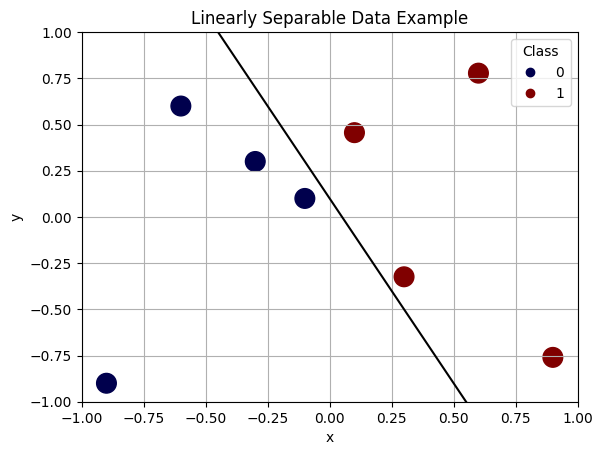

In [47]:
# Sample Graph code, You can use any graphing approach you want including this one.
# We encourage you to use matplotlib.


# The data in this example is made up.  You will use your real data.
data = np.array([[-.9,-.9],[-.6,.6],[-.3,.3],[-.1,.1],[.1,.456],[.3,-.324],[.6,.778],[.9,-.76]])
labels = np.array([0,0,0,0,1,1,1,1])

# Create a scatter plot of data
plt.xlim(-1,1)
plt.ylim(-1,1)
scatter = plt.scatter(data[:,0], data[:,1], c = labels, s=200, cmap='seismic')
legend = plt.legend(*scatter.legend_elements(num=1), title="Class", loc='upper right') # Legend

# Plot the learned separator.  We just made up the slope and intercept for this example. You need to calculate 
# the correct slope and intercept using your learned weights and bias.
xlist = np.linspace(-1.0, 1.0, 100) # create 100 evenly spaced points between -1 and 1 for the x axis
ylist = np.linspace(-1.0, 1.0, 100) # create 100 evenly spaced points between -1 and 1 for the y axis
slope = -2  # made up
intercept = 0.1 # made up
eq = slope*xlist + intercept
plt.plot(xlist,  eq, '-k', )
plt.title('Linearly Separable Data Example')
plt.xlabel('x')
plt.ylabel('y')
plt.grid() # add grid lines
plt.show() # show the plot

In [7]:
# Graph datasets and print("Linearly Separable")
load_data('linearly_separable.arff', 1000, plot=True) 

print("\nNon-Linearly Separable")
load_data('non_linearly_separable.arff', 1000, plot=True)

*Discussion* 

I discussed the graphs in my previous discussion.

### 2.4 (5%) Discuss why perceptrons in general will not get perfect accuracy on non-linearly separable data

*Discussion*

I feel like it's pretty simple. If the data cannot be separated into classes with a linear function, then the perceptron (something that creates a linear function to separate data into classes) won't be able to do that. It will create a line as best it can, but ultimately, if a line cannot be drawn to perfectly separate the classes, perceptrons will not be perfectly accurate when attempting to separate the classes.

## 3. Use the perceptron to learn this version of the [voting data set](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/voting-dataset.arff)

This particular task is an edited version of the standard voting set, where we have replaced all the “don’t know” values with the most common value for the particular attribute. Look at the [tutorial](https://github.com/cs472ta/CS472/blob/master/Tutorial.ipynb) from the Labs Content page to see examples of prepping the voting data set for sklearn.

### 3.1 (10%) Average final training and test set accuracy over multiple trials

- Learn the voting data five times with different random 70/30 Training/Test splits each time
- Use a learning rate of 1.  The other hyperparameters are up to you.
- Report the 5 trials and the average training and test accuracy and number of epochs to converge across the 5 trials in a table 
    - Below is an example of what a 2 trial table might look like

| Trial | Training Accuracy | Test accuracy | Number of epochs |
| --- | --- | --- | --- |
| 1 | .950 | .550 | 4 |
| 2 | .850 | .450 | 6 |
| Average | .900 | .500 | 5 | 

*- As a rough sanity check, typical Perceptron test accuracies for the voting data set are 90%-98%.*


In [57]:
# Run the perceptron 5 times on the voting data set with different splits and record the results.
# Hint: look up scikit-learn train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Create the table using the tool of your choice
voting_data = arff.loadarff('voting-dataset.arff')
voting_df = pd.DataFrame(voting_data[0])
voting_label_encoded_df = voting_df.apply(LabelEncoder().fit_transform)

Data_Set_np = voting_label_encoded_df.to_numpy()

X = Data_Set_np[:, :-1]
y = Data_Set_np[:, -1]

# create a list of 5 different testing percentages
test_sizes = [0.2, 0.4, 0.6, 0.8, 0.9]



def train_voting_data(x, y, percentage: float):
    # separate data into training and testing splits
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=percentage, test_size=(1-percentage))
    
    # create perceptron
    clf = Perceptron(shuffle=False, verbose=0, eta0=.1)
    
    # train perceptron
    clf.fit(x_train, y_train)
    
    # get training accuracy
    train_accuracy = clf.score(x_train, y_train)
    
    # get testing accuracy
    test_accuracy = clf.score(x_test, y_test)
    
    return train_accuracy, test_accuracy
    
    
headers = ["Trial", "Training Accuracy", "Testing Accuracy", "Number of Epochs"]
table = []
for index, percentage in enumerate(test_sizes):
    training_accuracy, testing_accuracy = train_voting_data(X, y, percentage)
    table.append([index + 1, training_accuracy, testing_accuracy])
    
from tabulate import tabulate
print(tabulate(table, headers))
    



  Trial    Training Accuracy    Testing Accuracy
-------  -------------------  ------------------
      1             0.934783            0.899729
      2             0.994565            0.931408
      3             0.931159            0.951351
      4             0.9375              0.935484
      5             0.966184            0.914894


### 3.2 (10%) Interpreting the Model
- Learn with the perceptron once on the full voting data set
- Look at the learned weights and bias and do your best to explain what the model has learned and how the individual input features affect the result. 
- Which specific features are most critical for the voting task, and which are least critical? 

In [ ]:
#Learn once on the full voting data set.  If you Look at our tutorial at the beginning 

Discuss how the different features effect prediction

### 3.3 (15%) Misclassification rate vs epochs 

Learn with the perceptron once on the full voting data set and graph the misclassification rate (number_misclassified  /  number_of_total_data_points) at each epoch until convergence (0th – final epoch).  Hints:
- For the 0th epoch (i.e. initial weights), assume the initial misclassification rate is 66% and let that be the first point on your graph. Since there are 3 output classes, random guessing would only get it right about 1/3 of the time. Missclassifcation rate is 1 - accuracy.
- Doing clf.fit with max_iter = 1, and warm_start=True will let you loop through epochs one at a time, allowing you to look at accuracy, etc. after each epoch.  But how do you know how many epochs to run until convergence?  One way is to just to first run it until convergence with random_state = c to see how many epochs it took (n_iter_).  Then run it again one epoch at a time n_iter_ times using the same random_state constant c (so that you get the exact same conditions).
- Below is a rough example of what this type of graph might look like (though this graph is for avg rate across multiple trials)

![Average Misclassification Rate](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/avg_misclassification_rate_vs_epochs.png)

In [14]:
# Learn once on the full voting data set, while gathering info after every epoch
# Then Graph it here.  Here is some sample graph code, but you can do it your own way, including using a bar graph, etc.
    
def plot_misclassification(misclassification_rate):
    """
        Plots the misclassification rate
    Args:
        misclassification_rate (array-like): A 1D array or list of missclassifcation rate at every epoch
    """
    plt.plot(np.arange(len(misclassification_rate)), misclassification_rate)
    plt.title("Misclassification Rate vs. Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Misclassification Rate")
    plt.show()

*Show table and discuss*

### 3.4 (15%) Hyperparameters
Read over all the Hyperparameters and their defaults in the scikit [perceptron documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html). With the voting data set, experiment briefly with EACH of the following 6 hyperparameters and discuss your findings.
- shuffle
- eta0 - learning rate
- verbose
- fit_intercept - whether to use a bias weight or not
- random state
- warm start

In [ ]:
# Run the model with different hyperparameters

Discussion

## 4 (15%) Use the perceptron to learn one other data set of your choice.  
- The UC Irvine Data Repository is one great source, but you may get your data set from wherever you like, though it should be a real world task.
- Report your results

In [11]:
# Load and Train on your dataset and report results

*Discuss how the perceptron did on the data set and why you think it performed as such.*

## 5. (Optional 15% extra credit) Code up your own perceptron learner 

Past versions of this class required students to code up their own version of each model and then compare results with scikit-learn.  Actually coding a model leads to better understanding of what is really happening "under the hood."  Though not required for this class, we give a significant extra credit reward for each lab to those who choose to code their own models.  If you choose to do this, your code must be your own, and NOT taken from any other source (including the text).  Once you are done coding we encourage you to look at other versions to see how yours compares.  Below is a scaffold you could use if you want. Requirements for this task:
- Your perceptron should support the methods shown in the example scaffold below.
- Your output node should output 1 if net is > 0, else 0.
- Use Stochastic/On-line training updates: Iterate and update weights after each training instance (i.e. not batch updates)
- Implement a stopping criteria: when your model has trained for a number of epochs with no improvement in accuracy, stop training. Note that the weights/accuracy do not usually change monotonically.
- Your class can inherit from the relevant scikit-learn learners (e.g. data shuffling, etc.), but don't call any of the super methods to accomplish the core methods in the scaffold.
- Run the evaluation data set and the voting data set above with your Perceptron version. Show and discuss your results and how they compare with the scikit-learn version.

In [12]:
# Your Perceptron Code

*Discussion*

In [ ]:
# Optional scaffold for Extra Credit Perceptron code.  IF you use this feel free to change/add any methods you want.

from sklearn.base import BaseEstimator, ClassifierMixin
class PerceptronClassifier(BaseEstimator,ClassifierMixin):

    def __init__(self, lr=.1, shuffle=True):
        """ 
            Initialize class with chosen hyperparameters.
        Args:
            lr (float): A learning rate / step size.
            shuffle: Whether to shuffle the training data each epoch. DO NOT 
            SHUFFLE for evaluation / debug datasets.
        """
        self.lr = lr
        self.shuffle = shuffle

    def fit(self, X, y, initial_weights=None):
        """ 
            Fit the data; run the algorithm and adjust the weights to find a 
            good solution
        Args:
            X (array-like): A 2D numpy array with the training data, excluding
            targets
            y (array-like): A 2D numpy array with the training targets
            initial_weights (array-like): allows the user to provide initial 
            weights
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        self.weights = self.initialize_weights() if not initial_weights else initial_weights

        return self

    def predict(self, X):
        """ 
            Predict all classes for a dataset X
        Args:
            X (array-like): A 2D numpy array with the training data, excluding 
            targets
        Returns:
            array, shape (n_samples,)
                Predicted target values per element in X.
        """
        pass

    def initialize_weights(self):
        """ Initialize weights for perceptron. Don't forget the bias!
        Returns:
        """

        return [0]

    def score(self, X, y):
        """ 
            Return accuracy of model on a given dataset. Must implement own 
            score function.
        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 2D numpy array with targets
        Returns:
            score : float
                Mean accuracy of self.predict(X) wrt. y.
        """

        return 0

    ### Returns the weights and bias. Not required but great for debugging.
    def get_weights(self):
        pass